# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import copy
import numpy as np
import scipy.misc as scpm
%matplotlib inline

In [3]:
modelar = pd.read_csv('data/Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('data/Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [4]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


In [5]:
missing_val_count=modelar.isnull().sum()

print(missing_val_count)

HY_id                                 0
HY_cod_postal                         0
HY_provincia                         42
HY_descripcion                     3942
HY_distribucion                    6745
HY_tipo                               0
HY_antiguedad                      5484
HY_metros_utiles                   2886
HY_metros_totales                    34
HY_num_banos                          0
HY_cert_energ                      8300
HY_num_terrazas                       0
HY_ascensor                           0
HY_trastero                           0
HY_num_garajes                        0
HY_precio                             0
HY_precio_anterior                 3158
IDEA_area                          2631
IDEA_poblacion                     2635
IDEA_densidad                      2635
IDEA_pc_1960                       2710
IDEA_pc_1960_69                    2710
IDEA_pc_1970_79                    2710
IDEA_pc_1980_89                    2710
IDEA_pc_1990_99                    2710


In [6]:
def load_images(filenames):
    images = np.asarray([scpm.imread(file) for file in filenames])
    return images

In [7]:
names = sorted(glob.glob('imagenes_inmuebles_haya/*.jpg'))

names

['imagenes_inmuebles_haya\\6028499__posifoto1__qm2eBORaFws.jpg',
 'imagenes_inmuebles_haya\\6028499__posifoto2__qm2eBhKxMHp.jpg',
 'imagenes_inmuebles_haya\\6028499__posifoto3__qm2eAImwzo9.jpg',
 'imagenes_inmuebles_haya\\6028499__posifoto4__qm2eAb5E1KX.jpg',
 'imagenes_inmuebles_haya\\6028499__posifoto5__qm2eyj82lhX.jpg',
 'imagenes_inmuebles_haya\\6028500__posifoto1__212PcqynWv.jpg',
 'imagenes_inmuebles_haya\\6028500__posifoto2__212PKOAlSZ.jpg',
 'imagenes_inmuebles_haya\\6028500__posifoto3__214dawbYiu.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto10__qm2eEBmxPUs.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto1__qxOgiWK6s3U.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto2__qxOgir655Wu.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto3__qxOghRhkq20.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto4__qm2eHTaD7d3.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto5__qm2eHjAsKVJ.jpg',
 'imagenes_inmuebles_haya\\6028502__posifoto6__qm2eGHIzKyr.jpg',
 'imagenes_inmuebles_haya\\

In [8]:
images=load_images(names[0:100])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


## Nota: 
La imagen *'6031545__posifoto3__1K9lJvlehV.jpg'* ha sido eliminada al estar corrupta y dar problemas:

import os
os.remove("imagenes_inmuebles_haya\\6031545__posifoto3__1K9lJvlehV.jpg")

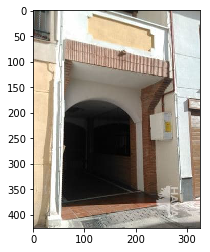

In [11]:
plt.imshow(images[0])

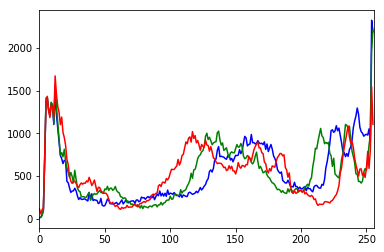

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([images[0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [13]:
modelar_p=modelar[['HY_id']]
modelar_p.insert(1, 'piscina', False)
modelar_p['piscina']=modelar.loc[modelar['HY_descripcion'].notnull()]['HY_descripcion'].str.contains('iscina')
modelar_p.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,HY_id,piscina
0,6028499,False
1,6028500,NaN
2,6028502,False
3,6028512,False
4,6028513,False


In [11]:
import cv2

g = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
a = np.array(g)
print (a.max(), np.unravel_index(a.argmax(), a.shape))
a[188:208,478:498] =255
cv2.imshow('aaa',a)


255 (0, 49)


from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'imagenes_inmuebles_haya\\6028500__posifoto1__212PcqynWv.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

In [14]:
%matplotlib inline
import numpy as np
import cv2

Z = images[0].reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((images[0].shape))

cv2.imshow('res2',res2)